In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Part 3) Clustered indexes for join: Repeat the join experiment, but build a clustered index on the join key X.c and another one on the field Y.c.  Report on these results relative to the other indexing schemes.

In [2]:
join_query_time = pd.DataFrame({"Type": ["Baseline", "Btree", "Cover", "Filter", "Clustered"],
                                "20%": [34.5614, 33.3448, 32.793, 31.5016, 32.439],
                                "50%": [44.7684, 45.69, 45.2936, 44.2624, 43.2228],
                                "80%": [56.2124, 54.5628, 54.1644, 54.346, 53.6912]})

In [4]:
join_query_time

,Type,20%,50%,80%
0,Baseline,34.5614,44.7684,56.2124
1,Btree,33.3448,45.6900,54.5628
2,Cover,32.7930,45.2936,54.1644
3,Filter,31.5016,44.2624,54.3460
4,Clustered,32.4390,43.2228,53.6912


In [6]:
join_query_time = pd.melt(join_query_time, id_vars = "Type", var_name = "Selectivity", value_name = "Time (ms)")

In [7]:
join_query_time

,Type,Selectivity,Time (ms)
0,Baseline,20%,34.5614
1,Btree,20%,33.3448
2,Cover,20%,32.7930
3,Filter,20%,31.5016
4,Clustered,20%,32.4390
5,Baseline,50%,44.7684
6,Btree,50%,45.6900
7,Cover,50%,45.2936
8,Filter,50%,44.2624
9,Clustered,50%,43.2228


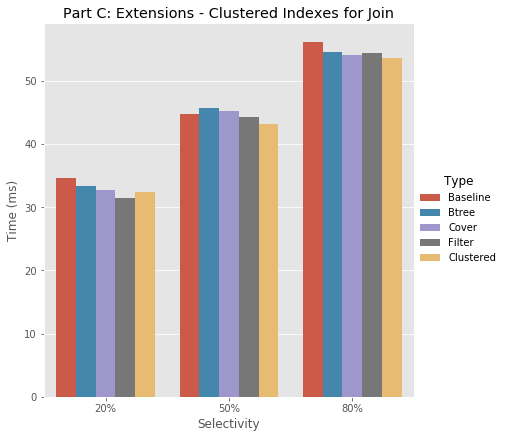

In [8]:
plt.style.use('ggplot')
sns.catplot(x = 'Selectivity', y = 'Time (ms)', hue = 'Type', data = join_query_time, kind = 'bar', height = 6, aspect = 1)
plt.title("Part C: Extensions - Clustered Indexes for Join")
plt.show()

### Part 4) Index build timing: Report the time it takes to build the indexes used in the main experiment, considering different table sizes

In [2]:
index_build_time = pd.DataFrame({"Type": ["Btree-TrackiId","Btree-Millseconds", "Cover", "Reverse"],
                                "20%": [88.60, 83.83, 84.00, 154.33],
                                "50%": [86.20, 86.66, 70.00, 121.00],
                                "80%": [75.40, 81.83, 79.50, 78.16]})

In [3]:
index_build_time

,Type,20%,50%,80%
0,Btree-TrackiId,88.60,86.20,75.40
1,Btree-Millseconds,83.83,86.66,81.83
2,Cover,84.00,70.00,79.50
3,Reverse,154.33,121.00,78.16


In [4]:
index_build_time = pd.melt(index_build_time, id_vars = "Type", var_name = "Size Reduced", value_name = "Time (ms)")

In [5]:
index_build_time

,Type,Size Reduced,Time (ms)
0,Btree-TrackiId,20%,88.60
1,Btree-Millseconds,20%,83.83
2,Cover,20%,84.00
3,Reverse,20%,154.33
4,Btree-TrackiId,50%,86.20
5,Btree-Millseconds,50%,86.66
6,Cover,50%,70.00
7,Reverse,50%,121.00
8,Btree-TrackiId,80%,75.40
9,Btree-Millseconds,80%,81.83


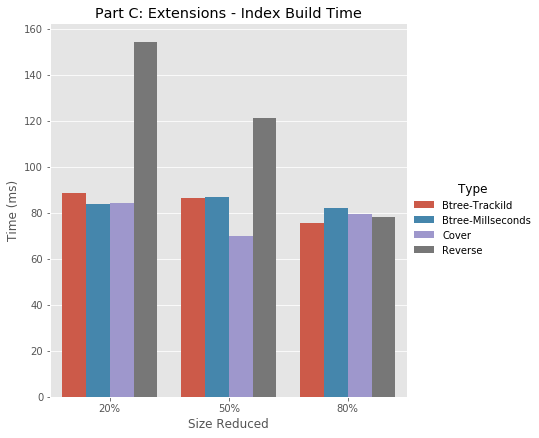

In [6]:
plt.style.use('ggplot')
sns.catplot(x = 'Size Reduced', y = 'Time (ms)', hue = 'Type', data = index_build_time, kind = 'bar', height = 6, aspect = 1)
plt.title("Part C: Extensions - Index Build Time")
plt.show()